# Simple Linear Regression

- Limited to just 1 feature

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Advertising.csv')
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [3]:
df['total_spend'] = (df['TV'] + df['radio'] + df['newspaper'])

In [4]:
df.head()

,TV,radio,newspaper,sales,total_spend
0,230.1,37.8,69.2,22.1,337.1
1,44.5,39.3,45.1,10.4,128.9
2,17.2,45.9,69.3,9.3,132.4
3,151.5,41.3,58.5,18.5,251.3
4,180.8,10.8,58.4,12.9,250.0


<AxesSubplot:xlabel='total_spend', ylabel='sales'>

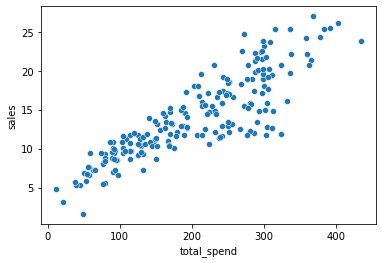

In [5]:
# Relationship between advertising spend and sales.

sns.scatterplot(
    data=df,
    x='total_spend',
    y='sales'
)

# From scatterplot you can see a clear relationship.

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

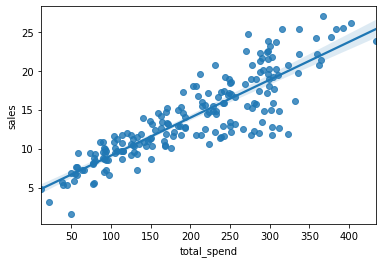

In [6]:
# REGPLOT - gives us the best fit line.
sns.regplot(
    data=df,
    x='total_spend',
    y='sales'
)

In [7]:
X = df['total_spend'] # Capital x for feature matrix
y = df['sales']

In [9]:
# numpy comes with OLS! np.polyfit()
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    .. note::
       This forms part of the old polynomial API. Since version 1.4, the
       new polynomial API defined in `numpy.polynomial` is preferred.
       A summary of the differences can be found in the
       :doc:`transition guide </reference/routines.polynomials>`.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_

In [11]:
# y = mx + b
# y = B1x + B0
np.polyfit(X, y, deg=1) # Gives our beta coefficients (for any X predicts the y and vice versa)
# polyfit returns [B1, b0]

array([0.04868788, 4.24302822])

In [12]:
potential_spend = np.linspace(0, 500, 100)

In [18]:
# Get the beta coefficients out of polyfit
[B1, B0] = np.polyfit(X, y, deg=1) 
# Use the OLS equation to generate all the y values.
predicted_sales = B1 * potential_spend + B0 # y = B1 * x + B0

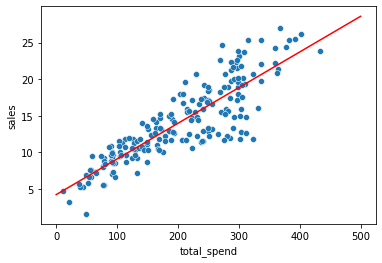

In [19]:
# Replicate regplot!
sns.scatterplot(x='total_spend', y='sales', data=df)
# Regression line!
plt.plot(potential_spend, predicted_sales, color='red') 

In [21]:
[B1, B0] = np.polyfit(X, y, deg=1) 

spend = 200 # what is the sales for this expenditure?

predicted_sale = B1 * spend + B0
predicted_sale

13.98060407984596

In [22]:
np.polyfit(X, y, 3)

array([ 3.07615033e-07, -1.89392449e-04,  8.20886302e-02,  2.70495053e+00])

In [23]:
# y = B1x + B0

# y = B3x**3 + B2x**2 + B1x + B0

In [24]:
potential_spend = np.linspace(0, 500, 100)

In [25]:
[B3, B2, B1, B0] = np.polyfit(X, y, 3)
pred_sales = (B3 * potential_spend ** 3) + (B2 * potential_spend ** 2) + (B1 * potential_spend) + B0

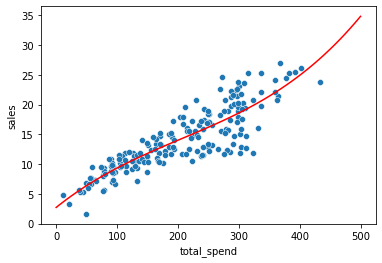

In [26]:
# Replicate regplot!
sns.scatterplot(x='total_spend', y='sales', data=df)
# Regression line!
plt.plot(potential_spend, pred_sales, color='red') 

# Results in a curved fit.